In [1]:
from dynRNN.cells import *
import numpy as np

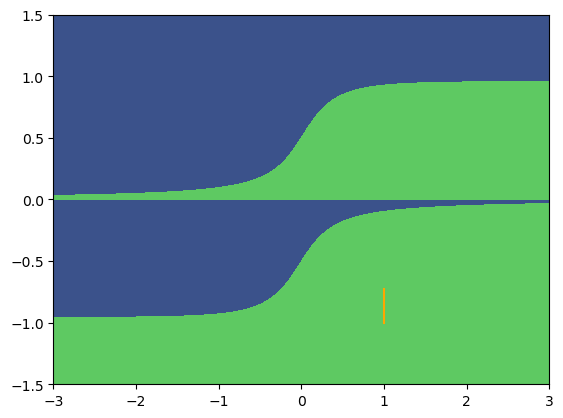

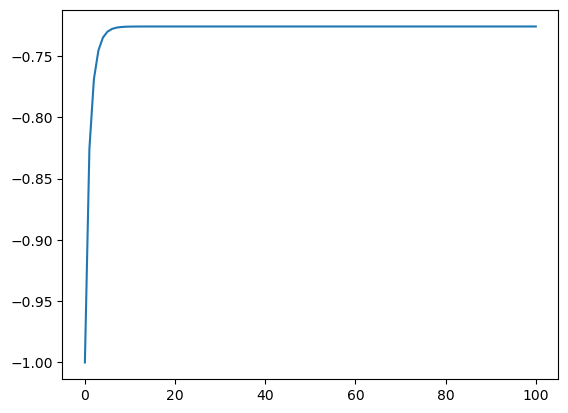

In [5]:
# BRC

x = torch.linspace(-3, 3, 1000)
y = torch.linspace(-1.5, 1.5, 1001)

xy_grid = torch.meshgrid(x, y, indexing="ij")

x_g = xy_grid[0].T
y_g = xy_grid[1].T.flip(0, 1)

BRC = BRCell()
Pa = 0
C = 0
W = 0
Wc = 1
Wa = 1
pars = Pa, C, W, Wc, Wa

ax = BRC.phaseplane(x_g, y_g, pars, input=0.1, bifurcation=True)

xt = torch.ones(100)
h0 = torch.tensor(-1)
s0 = torch.tensor(1)

ht, st = BRC.trajectory(h0, s0, pars, xt)
ax.plot(st[0]*torch.ones(len(ht)), ht, 'orange')
plt.show()

# plt.plot(xt)
# plt.plot(B*torch.tanh(torch.tensor(D*C))/(1-A)*torch.ones_like(xt), 'blue')
# plt.plot(D*torch.ones_like(xt), 'blue')
plt.plot(ht)
plt.show()

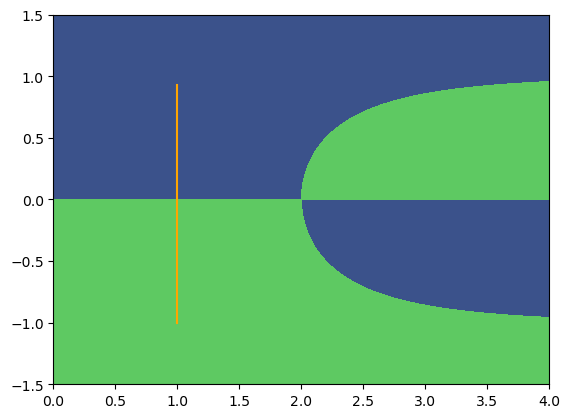

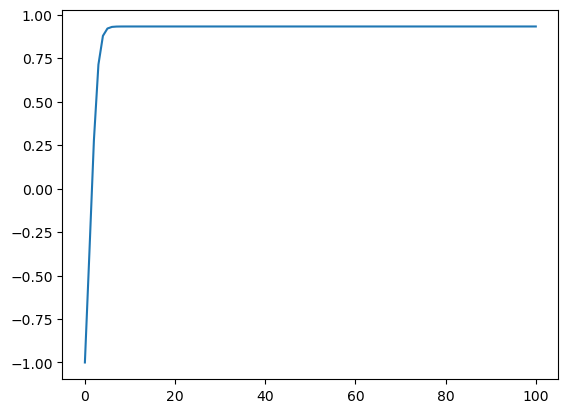

In [6]:
# GRU

x = torch.linspace(0, 4, 1000)
y = torch.linspace(-1.5, 1.5, 1001)

xy_grid = torch.meshgrid(x, y, indexing="ij")

x_g = xy_grid[0].T
y_g = xy_grid[1].T.flip(0, 1)

BRC = GRUCell()
Pa = 0
C = 1
W = 1
Wc = 1
Wa = 1
pars = Pa, C, W, Wc, Wa

ax = BRC.phaseplane(x_g, y_g, pars, input=0, bifurcation=True)

xt = torch.ones(100)
h0 = torch.tensor(-1)
s0 = torch.tensor(1)

ht, st = BRC.trajectory(h0, s0, pars, xt)
ax.plot(st[0]*torch.ones(len(ht)), ht, 'orange')
plt.show()

# plt.plot(xt)
# plt.plot(B*torch.tanh(torch.tensor(D*C))/(1-A)*torch.ones_like(xt), 'blue')
# plt.plot(D*torch.ones_like(xt), 'blue')
plt.plot(ht)
plt.show()

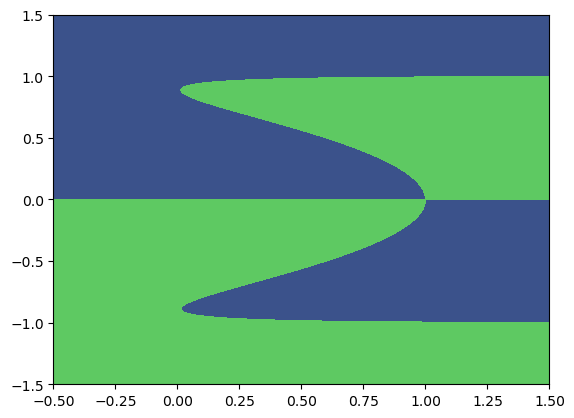

In [7]:
# TRC

x = torch.linspace(-0.5, 1.5, 1000)
y = torch.linspace(-1.5, 1.5, 1000)

xy_grid = torch.meshgrid(x, y, indexing="ij")

x_g = xy_grid[0].T
y_g = xy_grid[1].T.flip(0, 1)

TRC = TRCell()
C = 0.9
B = 2
pars = B, C

ax = TRC.phaseplane(x_g, y_g, pars, input=0, bifurcation=True)
plt.show()

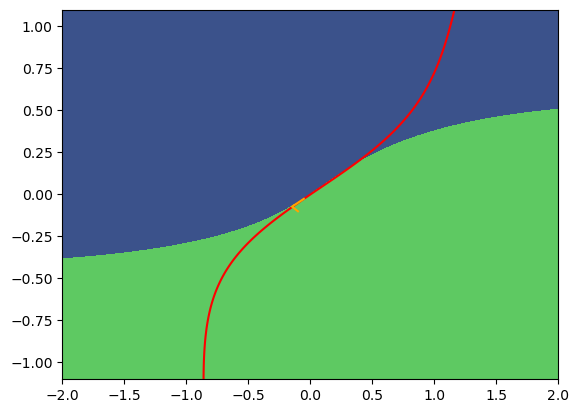

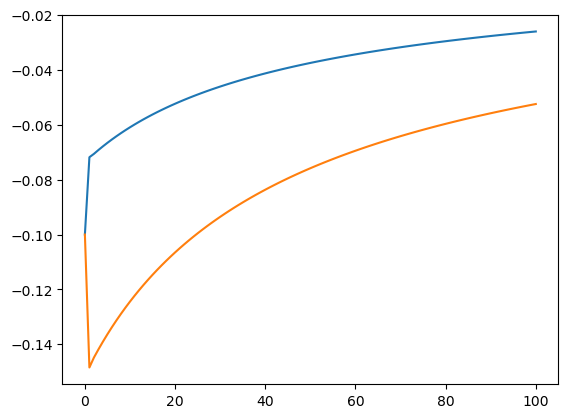

In [18]:
# LSTM

x = torch.linspace(-2, 2, 4001)
y = torch.linspace(-1.1, 1.1, 2201)

xy_grid = torch.meshgrid(x, y, indexing="ij")

x_g = xy_grid[0].T
y_g = xy_grid[1].T.flip(0, 1)

LSTM = LSTMCell()
A = torch.rand(1)-1/2
B = torch.rand(1)-1/2
D = torch.rand(1)-1/2
C = 2

P = 0
W = 1

Wa = torch.randn(1)
Wb = torch.randn(1)
Wd = torch.randn(1)
Wp = torch.randn(1)

pars = A, B, C, D, P, W, Wa, Wb, Wd, Wp

ax = LSTM.phaseplane(x_g, y_g, pars, input=0)

xt = .0*torch.randn(100)
h0 = -torch.tensor(0.1)
s0 = -torch.tensor(0.1)

ht, st = LSTM.trajectory(h0, s0, pars, xt)
ax.plot(st, ht, 'orange')
plt.show()

plt.plot(ht)
plt.plot(st)
plt.show()


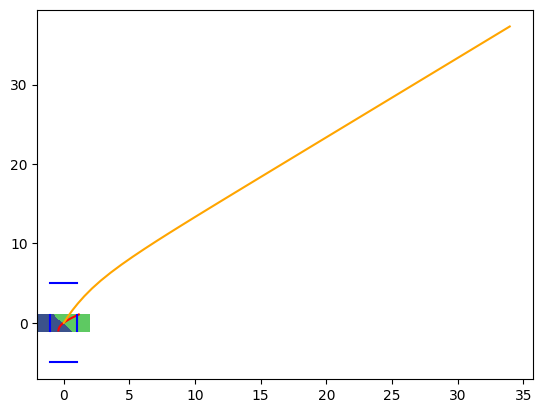

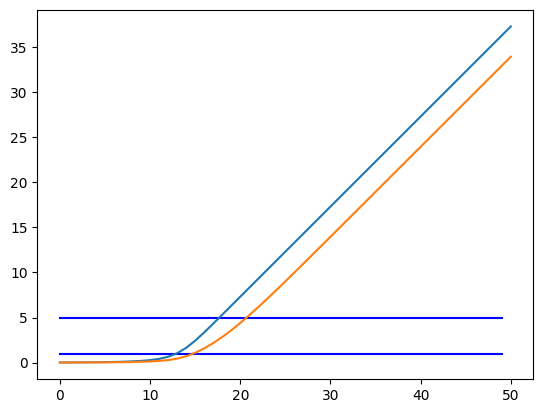

In [26]:

LSTM = LSTMCell()
A = .5 
B = .5 
C = .8 
D = 5
P = 1
W =  1
Wa = 1
Wb = 1
Wd = 1
Wp = 1

pars = A, B, C, D, P, W, Wa, Wb, Wd, Wp

ax = LSTM.phaseplane(x_g, y_g, pars, input=0)

testx = torch.linspace(-1, 1, 100)
ax.plot(B*torch.tanh(torch.tensor(D*C))/(1-A)*torch.ones_like(testx), testx, 'blue')
ax.plot(-B*torch.tanh(torch.tensor(D*C))/(1-A)*torch.ones_like(testx), testx, 'blue')

ax.plot(testx, -D*torch.ones_like(testx), 'blue')
ax.plot(testx, D*torch.ones_like(testx), 'blue')

xt = .0*torch.randn(50)
h0 = torch.tensor(0.01)
s0 = torch.tensor(0.01)

ht, st = LSTM.trajectory(h0, s0, pars, xt)
ax.plot(st, ht, 'orange')
plt.show()

# plt.plot(xt)
plt.plot(B*torch.tanh(torch.tensor(D*C))/(1-A)*torch.ones_like(xt), 'blue')
plt.plot(D*torch.ones_like(xt), 'blue')
plt.plot(ht)
plt.plot(st)
plt.show()

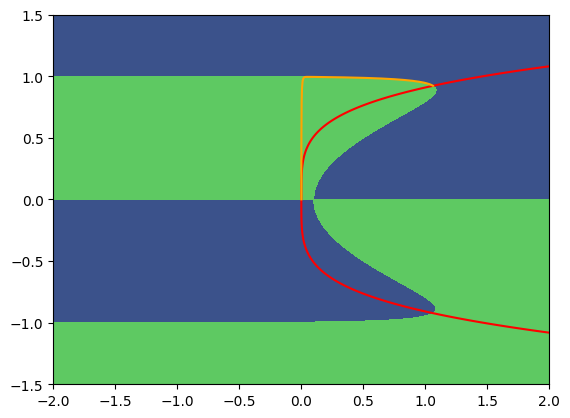

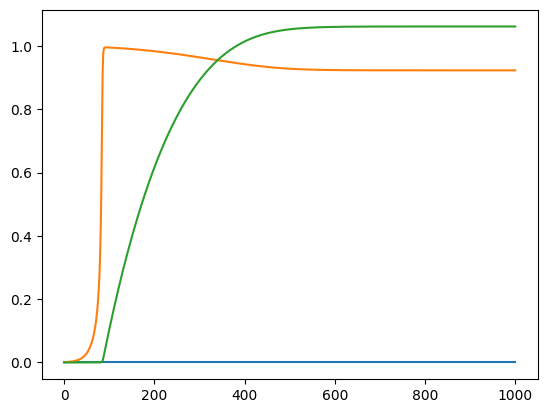

In [27]:
# Flex

x = torch.linspace(-2, 2, 1000)
y = torch.linspace(-1.5, 1.5, 1000)

xy_grid = torch.meshgrid(x, y, indexing="ij")

x_g = xy_grid[0].T
y_g = xy_grid[1].T.flip(0, 1)

FRC = FlexCell()
A = 1.1
B = 2
C = 0.7
D = 0.005
E = 1.1

pars = A, B, C, D, E

ax = FRC.phaseplane(x_g, y_g, pars, input=0)

xt = .0*torch.randn(1000)
h0 = torch.tensor(0.001)
s0 = torch.tensor(0)

ht, st = FRC.trajectory(h0, s0, pars, xt)
ax.plot(st, ht, 'orange')
plt.show()

plt.plot(xt)
plt.plot(ht)
plt.plot(st)
plt.show()

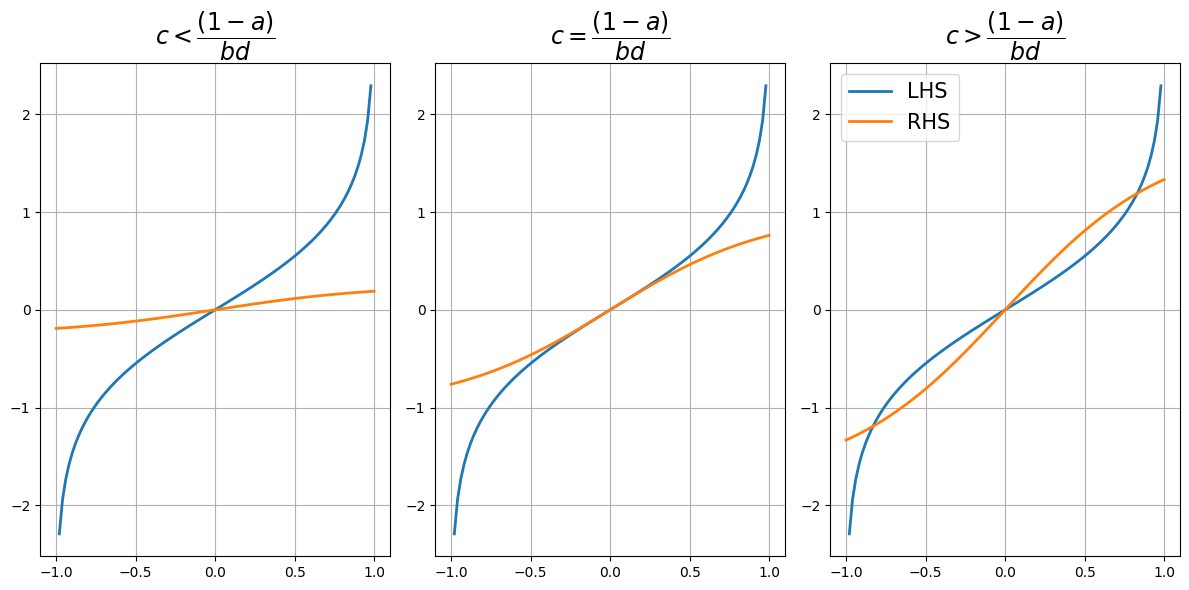

In [28]:
A = .5
B = .5
D = .5
C = (1-A)/(B*D)

s = torch.linspace(-1, 1, 100)

fig, ax = plt.subplots(1, 3, figsize = (12, 6))

ax[0].plot(s, torch.arctanh((1-A)*s/B), label = 'LHS', linewidth = 2)
ax[0].plot(s, (C - 1.5)*D*torch.tanh(s), label = 'RHS', linewidth = 2)
ax[0].grid()
ax[0].set_title(r'$c < \dfrac{(1-a)}{bd}$', fontsize = 17)

ax[1].plot(s, torch.arctanh((1-A)*s/B), label = 'LHS', linewidth = 2)
ax[1].plot(s, (C)*D*torch.tanh(s), label = 'RHS', linewidth = 2)
ax[1].grid()
ax[1].set_title(r'$c = \dfrac{(1-a)}{bd}$', fontsize = 17)

ax[2].plot(s, torch.arctanh((1-A)*s/B), label = 'LHS', linewidth = 2)
ax[2].plot(s, (C + 1.5)*D*torch.tanh(s), label = 'RHS', linewidth = 2)
ax[2].grid()
ax[2].legend(fontsize = 15)
ax[2].set_title(r'$c > \dfrac{(1-a)}{bd}$', fontsize = 17)

plt.tight_layout()
plt.savefig('images/Bifurcation.pdf')
plt.show()


### 3D biffurcation of GRU/BRC cell as in analysis

[[-0.31859883  4.          0.61277655]
 [-0.31859883  3.9995683   0.61411411]
 [-0.31859883  3.99871761  0.61711711]
 ...
 [ 1.54962469  3.99886053 -0.83933932]
 [ 1.54962469  3.99935637 -0.84234232]
 [ 1.54962469  4.         -0.84492946]]


interactive(children=(IntSlider(value=45, description='elevation', max=90, step=5), IntSlider(value=180, descr…

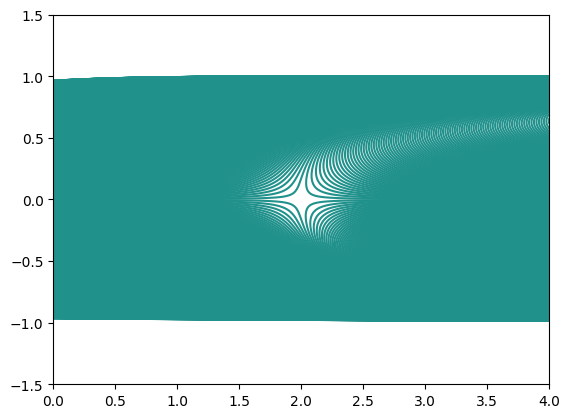

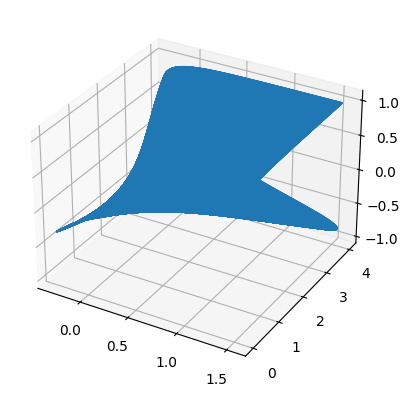

In [12]:
# GRU
x = torch.linspace(0, 4, 1000)
y = torch.linspace(-1.5, 1.5, 1000)

xy_grid = torch.meshgrid(x, y, indexing="ij")

x_g = xy_grid[0].T
y_g = xy_grid[1].T.flip(0, 1)

GRU = GRUCell()

C = 1
Wc = 1

Pa = 0
Wa = 1

W = 1

pars = Pa, C, W, Wc, Wa

bh_range = np.linspace(-2, 2, num =1200)
#ax = GRU.phaseplane(x_g, y_g, pars, input=0, bifurcation=True)
fixed_points = np.empty((0, 3))
fig = plt.figure()
ax = fig.add_subplot()
for bh in bh_range : 
    
    x_next = GRU.update(y_g, x_g, pars, x = bh)
    if type(x_next) is tuple:
        x_next = x_next[0]
    contour_data = ax.contour(x_g, y_g, x_next - y_g,0)
    dat0 = contour_data.allsegs
    if len(dat0) > 2 and len(dat0[1]) > 1:
        flatened = np.concatenate((dat0[1][0],dat0[1][1]),dtype = float,axis=0)
        expanded_flatened = np.column_stack((np.full(flatened.shape[0], bh), flatened))
        fixed_points = np.append(fixed_points, expanded_flatened, axis=0)


#ht, st = GRU.trajectory(h0, s0, pars, xt)
#ax.plot(st[0]*torch.ones(len(ht)), ht, 'orange')

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
print(fixed_points)
fixed_points = np.array(fixed_points)

ax.scatter(fixed_points[:,0], fixed_points[:,1], fixed_points[:,2],sizes= [0.1])


import torch
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display
from ipywidgets import interactive

# Create a function to plot the fixed points
def plot_fixed_points(elevation, azimuth):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(fixed_points[:,0], fixed_points[:,1], fixed_points[:,2], s=0.1)
    ax.view_init(elev=elevation, azim=azimuth)
    ax.set_xlabel('bh')
    ax.set_ylabel('ba')
    ax.set_zlabel('ht')
    display(fig)

# Create an interactive widget for rotating the plot
interactive_plot = interactive(plot_fixed_points, elevation=(0, 90, 5), azimuth=(0, 360, 5))
output = interactive_plot.children[-1]
output.layout.height = '500px'
interactive_plot

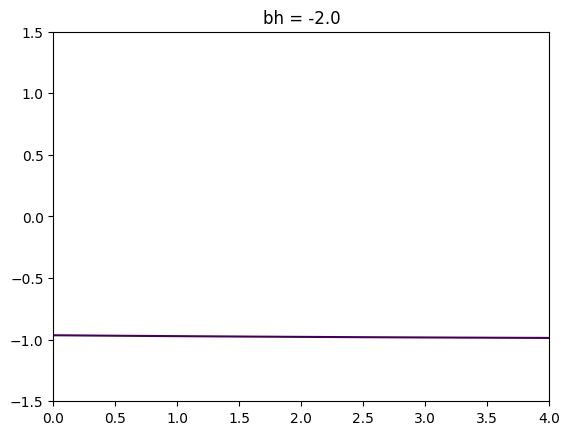

In [8]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
import cv2

bh_range = np.linspace(-2, 2, num =1200)

# Initialize the plot
fig, ax = plt.subplots()
contour = ax.contour(x_g, y_g, np.zeros_like(x_g), levels=[0])

def update(frame):
    ax.clear()
    bh = bh_range[frame]
    x_next = GRU.update(y_g, x_g, pars, x=bh)
    if isinstance(x_next, tuple):
        x_next = x_next[0]
    ax.contour(x_g, y_g, x_next - y_g, levels=[0])
    ax.set_title(f'bh = {bh}')

ani = FuncAnimation(fig, update, frames=len(bh_range), repeat=False)


ani.save('contour_video.gif', writer='pillow')


In [13]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display
from ipywidgets import interactive
print(fixed_points)
# Create a function to plot the 3D surface using fixed_points data
def plot_surface(elevation, azimuth):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Reshape the fixed_points array to create the surface
    bh_axis_data= fixed_points[:,0]
    ba_axis_data = fixed_points[:,1]
    ht_axis_data = fixed_points[:,2]
    
    ax.plot_trisurf(ht_axis_data, bh_axis_data, ba_axis_data, cmap='viridis')
    ax.view_init(elev=elevation, azim=azimuth)
    ax.set_xlabel('ht')
    ax.set_ylabel('bh')
    ax.set_zlabel('ba')
    display(fig)

# Create an interactive widget for rotating the 3D surface plot
interactive_plot = interactive(plot_surface, elevation=(0, 90, 5), azimuth=(0, 360, 5))
output = interactive_plot.children[-1]
output.layout.height = '500px'
interactive_plot


[[-0.31859883  4.          0.61277655]
 [-0.31859883  3.9995683   0.61411411]
 [-0.31859883  3.99871761  0.61711711]
 ...
 [ 1.54962469  3.99886053 -0.83933932]
 [ 1.54962469  3.99935637 -0.84234232]
 [ 1.54962469  4.         -0.84492946]]


interactive(children=(IntSlider(value=45, description='elevation', max=90, step=5), IntSlider(value=180, descr…